In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
annFile = 'pascal_train2012.json'
cocoannFile = 'annotations/instances_train2017.json'
pascal=COCO(annFile)
coco = COCO(cocoannFile)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
loading annotations into memory...
Done (t=8.28s)
creating index...
index created!


In [3]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
kitchen animal person sports food outdoor indoor electronic furniture accessory vehicle appliance


In [4]:
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
catIds

[1, 18, 41]

In [5]:
# imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds(imgIds = [324158])
# img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img = coco.loadImgs([172310])[0]

In [6]:
img

{'license': 3,
 'file_name': '000000172310.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000172310.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-18 10:55:59',
 'flickr_url': 'http://farm4.staticflickr.com/3567/4566789533_a39eac2e23_z.jpg',
 'id': 172310}

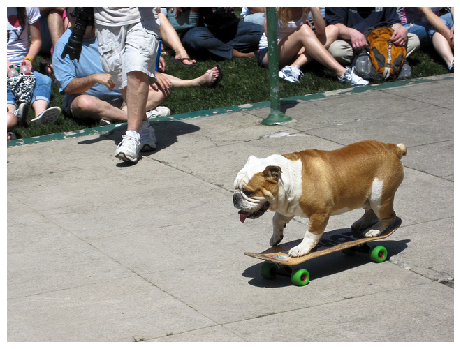

In [7]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

annIds:  [7954, 498595, 554126, 568608, 642571, 1221245, 1734301, 1748576, 1752377, 1756473, 2023905, 2026495, 2031317]
anns:  [{'segmentation': [[337.06, 230.0, 338.03, 227.1, 340.93, 223.24, 343.82, 218.41, 348.65, 213.58, 353.48, 210.68, 357.34, 215.51, 363.14, 217.44, 367.97, 215.51, 379.56, 212.61, 383.42, 211.65, 397.91, 209.72, 409.5, 209.72, 418.19, 207.78, 428.81, 206.82, 440.4, 206.82, 450.06, 205.85, 467.44, 206.82, 476.14, 204.89, 499.32, 199.09, 533.12, 190.4, 542.78, 193.3, 554.37, 196.19, 560.16, 196.19, 566.92, 200.06, 573.68, 209.72, 565.96, 214.54, 564.02, 223.24, 567.89, 237.72, 564.02, 254.14, 560.16, 260.9, 554.37, 267.66, 552.43, 276.36, 554.37, 293.74, 556.3, 295.67, 554.37, 308.23, 536.98, 318.85, 526.36, 324.65, 516.7, 327.54, 496.42, 327.54, 494.49, 322.71, 494.49, 315.95, 497.38, 308.23, 512.84, 296.64, 513.8, 290.84, 509.94, 289.88, 495.45, 291.81, 479.03, 294.71, 459.72, 298.57, 458.75, 308.23, 438.47, 343.0, 433.64, 352.65, 416.26, 358.45, 399.84, 356.52, 

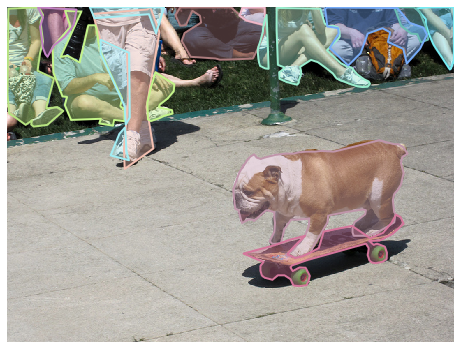

In [8]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print("annIds: ", annIds)
anns = coco.loadAnns(annIds)
print("anns: ", anns)
coco.showAnns(anns)

In [9]:
cats = pascal.loadCats(pascal.getCatIds())
nms=[cat['name'] for cat in cats]
print('Pacal categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('Pascal supercategories: \n{}'.format(' '.join(nms)))

Pacal categories: 
aeroplane bicycle bird boat bottle bus car cat chair cow diningtable dog horse motorbike person pottedplant sheep sofa train tvmonitor

Pascal supercategories: 
none


In [10]:
# get all images containing given categories, select one at random
catIds = pascal.getCatIds(catNms=['dog']);
imgIds = pascal.getImgIds(catIds=catIds );
# imgIds = pascal.getImgIds(imgIds = [324158])
img = pascal.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img = pascal.loadImgs([2010000857])[0]

In [11]:
img

{'file_name': '2010_000857.jpg', 'height': 500, 'width': 330, 'id': 2010000857}

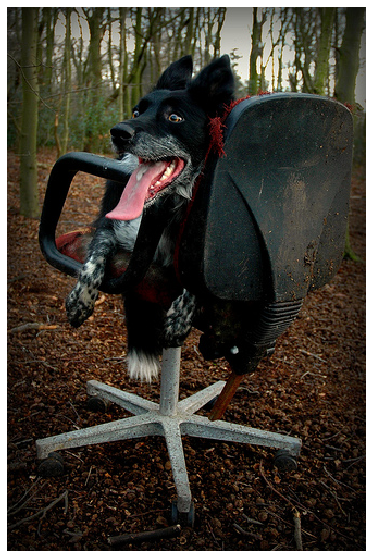

In [12]:
I = io.imread('../VOCtrainval_11-May-2012/VOCdevkit/VOC2012/JPEGImages/2010_000857.jpg')
plt.axis('off')
plt.imshow(I)
plt.show()

[{'segmentation': [[51, 42, 51, 348, 213, 348, 213, 42]], 'area': 49572, 'iscrowd': 0, 'image_id': 2010000857, 'bbox': [51, 42, 162, 306], 'category_id': 12, 'id': 10233, 'ignore': 0}]


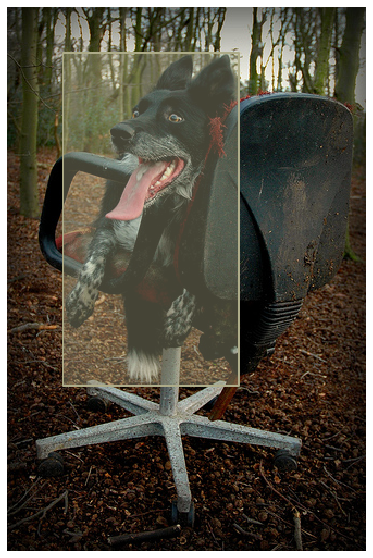

In [13]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = pascal.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = pascal.loadAnns(annIds)
print(anns)
pascal.showAnns(anns)